In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#Read in the data
expression_df = pd.read_csv('hg19.cage_peak_tpm_ann_decoded.osc.txt.gz.extract.tsv', sep='\t')

In [4]:
print("Number of Genes: " + str(len(expression_df)))
expression_df.head()

Number of Genes: 184827


,00Annotation,uniprot_id,Burkitt's lymphoma cell line:DAUDI CNhs10739.10422-106C8,Burkitt's lymphoma cell line:RAJI CNhs11268.10476-106I8,Ewing's sarcoma cell line:Hs 863.T CNhs11836.10705-109H3,Hodgkin's lymphoma cell line:HD-Mar2 CNhs11715.10435-106E3,"MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep2 CNhs12475.13097-140D1","MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep3 CNhs12703.13163-141B4",NK T cell leukemia cell line:KHYG-1 CNhs11867.10777-110G3,"Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep2 (A2 T0) CNhs12859.12760-136B6",...,teratocarcinoma cell line:NCR-G1 CNhs11884.10798-110I6,testicular germ cell embryonal carcinoma cell line:ITO-II CNhs11876.10786-110H3,testicular germ cell embryonal carcinoma cell line:NEC14 CNhs12351.10591-108D6,testicular germ cell embryonal carcinoma cell line:NEC15 CNhs12362.10593-108D8,testicular germ cell embryonal carcinoma cell line:NEC8 CNhs11726.10590-108D5,thyroid carcinoma cell line:TCO-1 CNhs11872.10783-110G9,transitional-cell carcinoma cell line:5637 CNhs10735.10418-106C4,transitional-cell carcinoma cell line:JMSU1 CNhs11261.10492-107B6,tridermal teratoma cell line:HGRT CNhs11828.10694-109G1,tubular adenocarcinoma cell line:SUIT-2 CNhs11883.10797-110I5
0,"chr10:100013403..100013414,-",NaN,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.08,0.00,0.0,0.09
1,"chr10:100027943..100027958,-",uniprot:Q96JB6,0.0,0.0,21.37,0.0,0.79,0.0,0.00,0.73,...,1.14,0.1,0.0,0.09,0.0,5.72,7.81,0.64,0.0,27.58
2,"chr10:100076685..100076699,+",NaN,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00
3,"chr10:100150910..100150935,-",NaN,0.0,0.0,0.00,0.0,0.00,0.0,0.34,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00
4,"chr10:100150951..100150962,-",NaN,0.0,0.0,0.00,0.0,0.00,0.0,0.45,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00


In [5]:
# Remove null values for gene ids
expression_df = expression_df[expression_df['uniprot_id'].notnull()]

In [6]:
print('Number of Genes: ' + str(len(expression_df)))

Number of Genes: 56011


In [7]:
# Want to only include experiments with high read counts - higher sample size = more significant data
counts_df = pd.read_csv('hg19.cage_peak_counts_ann_decoded.osc.txt.gz.extract.tsv', sep='\t')

In [8]:
# Same filtering as expression data
counts_df = counts_df[counts_df['uniprot_id'].notnull()]
counts_df.head()

,00Annotation,uniprot_id,Burkitt's lymphoma cell line:DAUDI CNhs10739.10422-106C8,Burkitt's lymphoma cell line:RAJI CNhs11268.10476-106I8,Ewing's sarcoma cell line:Hs 863.T CNhs11836.10705-109H3,Hodgkin's lymphoma cell line:HD-Mar2 CNhs11715.10435-106E3,"MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep2 CNhs12475.13097-140D1","MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep3 CNhs12703.13163-141B4",NK T cell leukemia cell line:KHYG-1 CNhs11867.10777-110G3,"Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep2 (A2 T0) CNhs12859.12760-136B6",...,teratocarcinoma cell line:NCR-G1 CNhs11884.10798-110I6,testicular germ cell embryonal carcinoma cell line:ITO-II CNhs11876.10786-110H3,testicular germ cell embryonal carcinoma cell line:NEC14 CNhs12351.10591-108D6,testicular germ cell embryonal carcinoma cell line:NEC15 CNhs12362.10593-108D8,testicular germ cell embryonal carcinoma cell line:NEC8 CNhs11726.10590-108D5,thyroid carcinoma cell line:TCO-1 CNhs11872.10783-110G9,transitional-cell carcinoma cell line:5637 CNhs10735.10418-106C4,transitional-cell carcinoma cell line:JMSU1 CNhs11261.10492-107B6,tridermal teratoma cell line:HGRT CNhs11828.10694-109G1,tubular adenocarcinoma cell line:SUIT-2 CNhs11883.10797-110I5
1,"chr10:100027943..100027958,-",uniprot:Q96JB6,0,0,43,0,1,0,0,8,...,9,1,0,1,0,51,96,6,0,307
6,"chr10:100174900..100174956,-",uniprot:Q8N2H3,0,0,9,4,34,30,0,0,...,41,40,8,69,6,84,103,20,5,166
7,"chr10:100174957..100174982,-",uniprot:Q8N2H3,0,0,3,0,4,6,0,0,...,10,7,3,4,0,11,23,3,2,23
14,"chr10:100206642..100206717,-","uniprot:Q92902,uniprot:Q658M9,uniprot:Q8WXE5",526,176,77,56,52,33,355,132,...,113,336,36,514,107,249,188,318,10,412
23,"chr10:100995440..100995474,-",uniprot:Q8WWQ2,0,0,0,0,0,0,0,0,...,0,2,1,0,0,0,0,0,0,0


In [9]:
#Count total counts for each experiment
expression_df['total_reads'] = counts_df.sum(axis=1)

# filter expression data for experiments with read counts of at least 10000
expression_df = expression_df[expression_df.total_reads >= 10000]
print('Number of genes: ' + str(len(expression_df)))

Number of genes: 9386


In [10]:
# remove any genes that have no expression for any cell line
expression_df.replace(0,np.nan, inplace=True)
expression_df = expression_df.dropna(axis=0,how='any')
print('Number of genes: ' + str(len(expression_df)))

Number of genes: 5426


In [11]:
expression_df =  expression_df.reset_index(drop=True)
expression_df = expression_df.drop('total_reads', axis=1)
expression_df.head()

,00Annotation,uniprot_id,Burkitt's lymphoma cell line:DAUDI CNhs10739.10422-106C8,Burkitt's lymphoma cell line:RAJI CNhs11268.10476-106I8,Ewing's sarcoma cell line:Hs 863.T CNhs11836.10705-109H3,Hodgkin's lymphoma cell line:HD-Mar2 CNhs11715.10435-106E3,"MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep2 CNhs12475.13097-140D1","MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep3 CNhs12703.13163-141B4",NK T cell leukemia cell line:KHYG-1 CNhs11867.10777-110G3,"Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep2 (A2 T0) CNhs12859.12760-136B6",...,teratocarcinoma cell line:NCR-G1 CNhs11884.10798-110I6,testicular germ cell embryonal carcinoma cell line:ITO-II CNhs11876.10786-110H3,testicular germ cell embryonal carcinoma cell line:NEC14 CNhs12351.10591-108D6,testicular germ cell embryonal carcinoma cell line:NEC15 CNhs12362.10593-108D8,testicular germ cell embryonal carcinoma cell line:NEC8 CNhs11726.10590-108D5,thyroid carcinoma cell line:TCO-1 CNhs11872.10783-110G9,transitional-cell carcinoma cell line:5637 CNhs10735.10418-106C4,transitional-cell carcinoma cell line:JMSU1 CNhs11261.10492-107B6,tridermal teratoma cell line:HGRT CNhs11828.10694-109G1,tubular adenocarcinoma cell line:SUIT-2 CNhs11883.10797-110I5
0,"chr10:101190374..101190429,-",uniprot:B7Z1I2,52.45,46.92,30.32,13.69,33.98,29.19,33.85,13.83,...,55.24,33.76,59.59,56.70,81.98,18.28,44.04,76.63,13.52,37.82
1,"chr10:101491828..101491900,-",uniprot:Q7KZN9,28.66,22.18,10.44,16.78,22.13,15.45,15.69,8.42,...,17.36,9.79,17.37,17.83,21.31,12.22,9.44,27.75,5.79,18.95
2,"chr10:101491968..101492076,+",uniprot:Q9NTM9,50.59,46.63,16.40,45.91,22.13,22.32,25.78,12.00,...,15.46,20.09,23.78,38.32,45.13,17.38,9.69,20.92,17.38,19.58
3,"chr10:101945771..101945795,-","uniprot:B0QZ43,uniprot:O75477",5.73,6.54,12.92,3.09,11.06,7.73,5.94,9.34,...,11.28,6.32,12.29,11.49,13.04,12.78,4.80,19.74,11.58,8.98
4,"chr10:101989315..101989368,-",uniprot:O15111,25.41,37.96,22.86,26.05,7.11,8.58,25.89,25.00,...,25.34,18.36,19.77,30.78,11.53,12.78,25.56,19.64,21.24,16.44


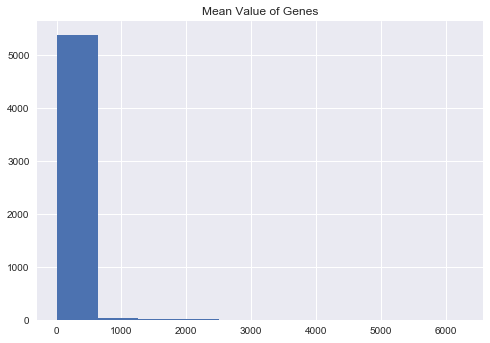

In [128]:
# Explore data distributions

plt.hist(expression_df.mean(axis=1))
plt.title('Mean Value of Genes')
plt.show()

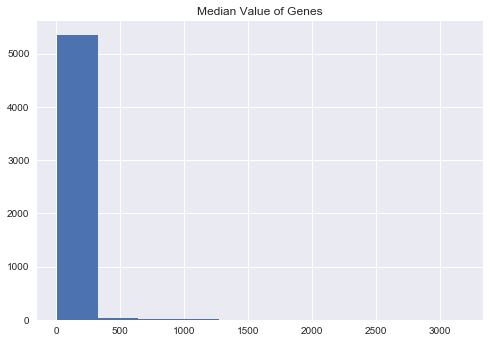

In [129]:
plt.hist(expression_df.median(axis=1))
plt.title('Median Value of Genes')
plt.show()

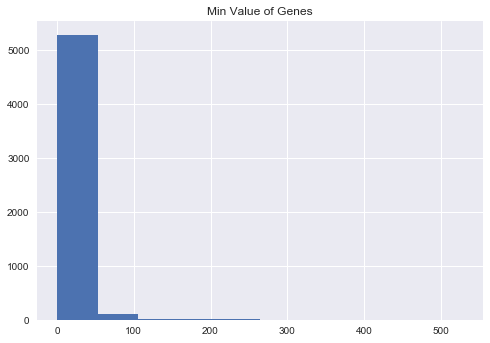

In [130]:
plt.hist(expression_df.min(axis=1))
plt.title('Min Value of Genes')
plt.show()

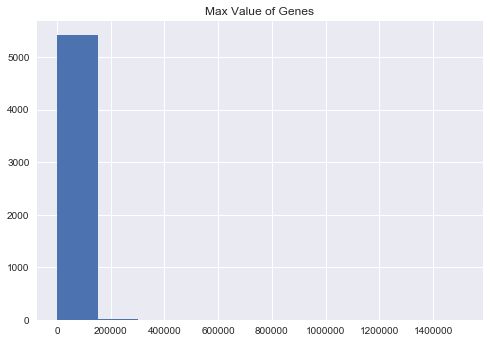

In [131]:
plt.hist(expression_df.max(axis=1))
plt.title('Max Value of Genes')
plt.show()

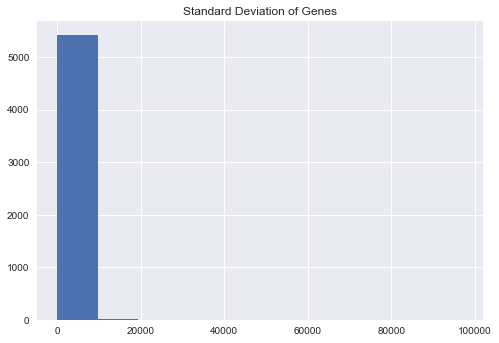

In [132]:
plt.hist(expression_df.std(axis=1))
plt.title('Standard Deviation of Genes')
plt.show()

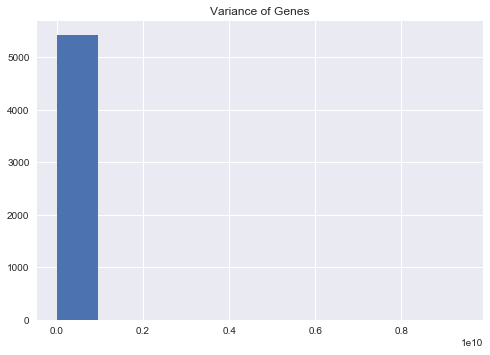

In [133]:
plt.hist(expression_df.var(axis=1))
plt.title('Variance of Genes')
plt.show()

In [12]:
# Data is still not very clean
# try computing log transformation of expression values to see if it can be better to work with
num_df = expression_df._get_numeric_data()
num_df[num_df < 2] = 2
num_df = num_df.apply(lambda x: np.log2(x) - np.log2(x.mean()), axis=1)

# Remove genes with low variance (stdev under 0.3)
num_df['st_dev'] = num_df.std(axis=1)
clean_num_df = num_df[num_df['st_dev'] > 0.3]

print(str(len(clean_num_df)))

5426


In [13]:
# search for statistically significant genes using t-test
from scipy import stats

clean_num_df['mean'] = clean_num_df.mean(axis=1)
clean_num_df['t-stat'], clean_num_df['p-value'] = stats.ttest_1samp(clean_num_df, clean_num_df['mean'], axis=1)

clean_num_df['t-stat'].value_counts(), clean_num_df['p-value'].value_counts()

( 0.000000e+00    3924
  9.174918e-16       1
  6.416617e-16       1
 -3.789731e-16       1
  6.184776e-16       1
  5.911728e-16       1
  3.557111e-16       1
  5.281273e-16       1
 -5.364853e-16       1
  1.020816e-15       1
 -3.915532e-16       1
 -3.762478e-16       1
 -6.092737e-16       1
 -5.883696e-16       1
  8.537962e-16       1
 -4.026630e-16       1
 -8.595887e-16       1
  5.321083e-16       1
 -5.528180e-16       1
  5.953503e-16       1
  5.678616e-16       1
 -3.961088e-16       1
 -4.158185e-16       1
  8.937941e-16       1
  5.218421e-16       1
  9.801483e-16       1
 -8.576237e-16       1
  8.328333e-16       1
 -1.392530e-15       1
  3.787164e-16       1
                  ... 
 -5.311056e-16       1
 -3.901104e-16       1
 -5.972718e-16       1
 -4.977589e-16       1
  3.814966e-16       1
 -9.189926e-16       1
 -5.954046e-16       1
  5.962660e-16       1
  6.552303e-16       1
 -3.940188e-16       1
 -7.169884e-16       1
  6.613950e-16       1
 -1.479809e

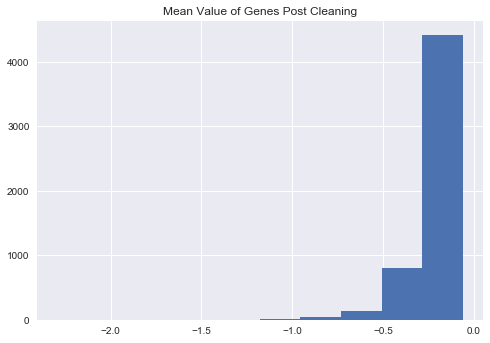

In [25]:
# data appears to be all over the place according to t-stat and p-value's

# Observe Data distribution after cleaning
clean_num_df = clean_num_df.drop(['mean', 't-stat', 'p-value'], axis=1)
plt.hist(clean_num_df.mean(axis=1))
plt.title('Mean Value of Genes Post Cleaning')
plt.show()

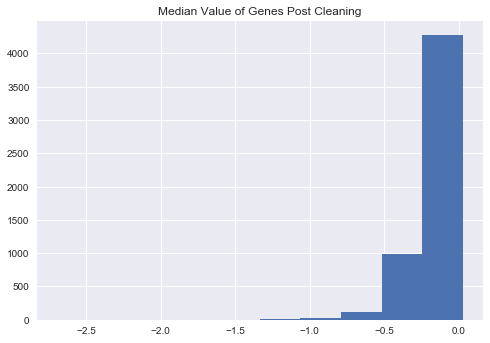

In [135]:
plt.hist(clean_num_df.median(axis=1))
plt.title('Median Value of Genes Post Cleaning')
plt.show()

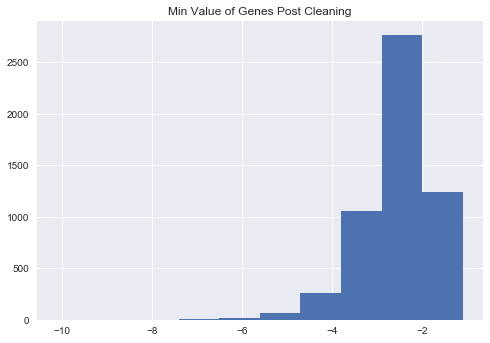

In [136]:
plt.hist(clean_num_df.min(axis=1))
plt.title('Min Value of Genes Post Cleaning')
plt.show()

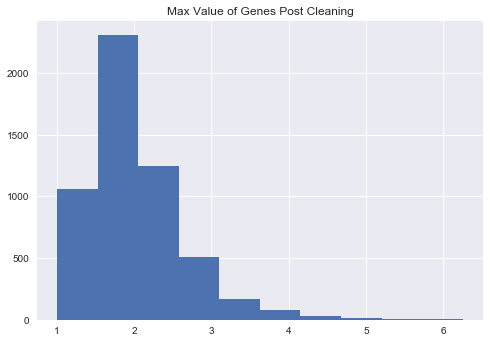

In [137]:
plt.hist(clean_num_df.max(axis=1))
plt.title('Max Value of Genes Post Cleaning')
plt.show()

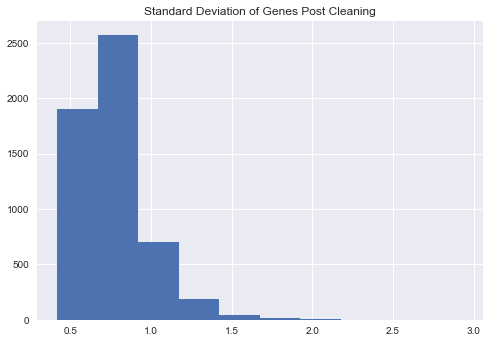

In [139]:
plt.hist(clean_num_df.std(axis=1))
plt.title('Standard Deviation of Genes Post Cleaning')
plt.show()

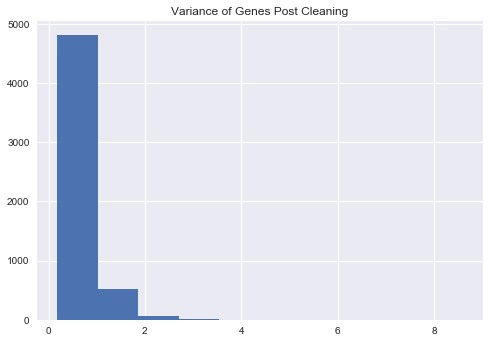

In [140]:
plt.hist(clean_num_df.var(axis=1))
plt.title('Variance of Genes Post Cleaning')
plt.show()

In [14]:
# still isn't great but much better than before

# create final dataframe
gene_id_df = expression_df.iloc[:,0:2]
gene_id_df.head()

,00Annotation,uniprot_id
0,"chr10:101190374..101190429,-",uniprot:B7Z1I2
1,"chr10:101491828..101491900,-",uniprot:Q7KZN9
2,"chr10:101491968..101492076,+",uniprot:Q9NTM9
3,"chr10:101945771..101945795,-","uniprot:B0QZ43,uniprot:O75477"
4,"chr10:101989315..101989368,-",uniprot:O15111


In [26]:
final_expression_df = pd.concat([gene_id_df, clean_num_df], axis=1)
final_expression_df.head()

,00Annotation,uniprot_id,Burkitt's lymphoma cell line:DAUDI CNhs10739.10422-106C8,Burkitt's lymphoma cell line:RAJI CNhs11268.10476-106I8,Ewing's sarcoma cell line:Hs 863.T CNhs11836.10705-109H3,Hodgkin's lymphoma cell line:HD-Mar2 CNhs11715.10435-106E3,"MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep2 CNhs12475.13097-140D1","MCF7 breast cancer cell line response to EGF1, 00hr00min, biol_rep3 CNhs12703.13163-141B4",NK T cell leukemia cell line:KHYG-1 CNhs11867.10777-110G3,"Saos-2 osteosarcoma treated with ascorbic acid and BGP to induce calcification, 00hr00min, biol_rep2 (A2 T0) CNhs12859.12760-136B6",...,teratocarcinoma cell line:NCR-G1 CNhs11884.10798-110I6,testicular germ cell embryonal carcinoma cell line:ITO-II CNhs11876.10786-110H3,testicular germ cell embryonal carcinoma cell line:NEC14 CNhs12351.10591-108D6,testicular germ cell embryonal carcinoma cell line:NEC15 CNhs12362.10593-108D8,testicular germ cell embryonal carcinoma cell line:NEC8 CNhs11726.10590-108D5,thyroid carcinoma cell line:TCO-1 CNhs11872.10783-110G9,transitional-cell carcinoma cell line:5637 CNhs10735.10418-106C4,transitional-cell carcinoma cell line:JMSU1 CNhs11261.10492-107B6,tridermal teratoma cell line:HGRT CNhs11828.10694-109G1,tubular adenocarcinoma cell line:SUIT-2 CNhs11883.10797-110I5
0,"chr10:101190374..101190429,-",uniprot:B7Z1I2,0.374489,0.213750,-0.416184,-1.563331,-0.251768,-0.470979,-0.257298,-1.548652,...,0.449260,-0.261139,0.558617,0.486895,1.018819,-1.146187,0.122361,0.921456,-1.581358,-0.097304
1,"chr10:101491828..101491900,-",uniprot:Q7KZN9,0.929673,0.559894,-0.527244,0.157377,0.556638,0.038241,0.060480,-0.837474,...,0.206401,-0.619985,0.207232,0.244941,0.502165,-0.300121,-0.672507,0.883122,-1.377730,0.332832
2,"chr10:101491968..101492076,+",uniprot:Q9NTM9,1.097073,0.979479,-0.528084,0.957029,-0.095776,-0.083442,0.124473,-0.978745,...,-0.613239,-0.235302,0.007969,0.696318,0.932307,-0.444351,-1.287211,-0.176897,-0.444351,-0.272399
3,"chr10:101945771..101945795,-","uniprot:B0QZ43,uniprot:O75477",-0.941555,-0.750799,0.231444,-1.832483,0.007190,-0.509622,-0.889627,-0.236667,...,0.035605,-0.800165,0.159323,0.062217,0.244782,0.215726,-1.197056,0.842960,0.073473,-0.293375
4,"chr10:101989315..101989368,-",uniprot:O15111,0.273768,0.852851,0.121197,0.309655,-1.563707,-1.292579,0.300766,0.250299,...,0.269788,-0.195063,-0.088316,0.550364,-0.866236,-0.717741,0.282259,-0.097834,0.015155,-0.354419


In [27]:
# Column Titles too long and messy, need to be cleaned

# get column names in list
columns = list(final_expression_df.iloc[:,2:].columns)

# take cell name and append it to clean column list
clean_columns=[]
for c in columns:
    c = c.split()[0:2]
    clean_columns.append(c[0]+ ' ' + c[1])

# create a dictionary of cell type counts
clean_column_dict = {}
for c in clean_columns:
    clean_column_dict[c] = clean_columns.count(c)

# label each separate cell with number in range of cell count    
final_columns = []
for c in clean_columns:
    for i in range(1,clean_column_dict[c]+1):
        final_columns.append(c + ' ' + str(i))

# function to remove duplicate values
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

# final column names
final_clean_columns = f7(final_columns)

# dictionary to keep for future to remember which clean column name is which actual cell 
columns_dict = {}
for c, f in zip(columns, final_clean_columns):
    columns_dict[c] = f

final_expression_df.rename(columns=dict(zip(columns, final_clean_columns)), inplace=True)
final_expression_df.head()

,00Annotation,uniprot_id,Burkitt's lymphoma 1,Burkitt's lymphoma 2,Ewing's sarcoma 1,Hodgkin's lymphoma 1,MCF7 breast 1,MCF7 breast 2,NK T 1,Saos-2 osteosarcoma 1,...,teratocarcinoma cell 3,testicular germ 1,testicular germ 2,testicular germ 3,testicular germ 4,thyroid carcinoma 1,transitional-cell carcinoma 1,transitional-cell carcinoma 2,tridermal teratoma 1,tubular adenocarcinoma 1
0,"chr10:101190374..101190429,-",uniprot:B7Z1I2,0.374489,0.213750,-0.416184,-1.563331,-0.251768,-0.470979,-0.257298,-1.548652,...,0.449260,-0.261139,0.558617,0.486895,1.018819,-1.146187,0.122361,0.921456,-1.581358,-0.097304
1,"chr10:101491828..101491900,-",uniprot:Q7KZN9,0.929673,0.559894,-0.527244,0.157377,0.556638,0.038241,0.060480,-0.837474,...,0.206401,-0.619985,0.207232,0.244941,0.502165,-0.300121,-0.672507,0.883122,-1.377730,0.332832
2,"chr10:101491968..101492076,+",uniprot:Q9NTM9,1.097073,0.979479,-0.528084,0.957029,-0.095776,-0.083442,0.124473,-0.978745,...,-0.613239,-0.235302,0.007969,0.696318,0.932307,-0.444351,-1.287211,-0.176897,-0.444351,-0.272399
3,"chr10:101945771..101945795,-","uniprot:B0QZ43,uniprot:O75477",-0.941555,-0.750799,0.231444,-1.832483,0.007190,-0.509622,-0.889627,-0.236667,...,0.035605,-0.800165,0.159323,0.062217,0.244782,0.215726,-1.197056,0.842960,0.073473,-0.293375
4,"chr10:101989315..101989368,-",uniprot:O15111,0.273768,0.852851,0.121197,0.309655,-1.563707,-1.292579,0.300766,0.250299,...,0.269788,-0.195063,-0.088316,0.550364,-0.866236,-0.717741,0.282259,-0.097834,0.015155,-0.354419


In [46]:
# With a large amount of data, interactive visualizations would be best here
# try plotly

import plotly.plotly as py
from plotly.graph_objs import *

In [47]:
# interactive histograms with expression breadth and average expression

# sum of gene expressions of each cell type
final_expression_df['breadth'] =  (final_expression_df[final_expression_df.columns[2:].values.tolist()].astype('float')
>0).sum(axis=1)

# get mean gene expression of each cell type
final_expression_df['avg'] = final_expression_df[final_expression_df.columns[2:].values.tolist()].astype('float').mean(axis=1)

# breadth histogram
trace1 = Histogram(
        name="expression breadth",
        x = final_expression_df['breadth'],
        marker=Marker(
        line=Line(
            color='grey',
            width=0
        ),
        ),
)

# average expression histogram
trace2 = Histogram(
        name="average expression",
        x = final_expression_df['avg'],
        marker=Marker(
        line=Line(
            color='grey',
            width=0
        ),
        ),
    xaxis='x2',
    yaxis='y2'
    )

# plot layout
layout = Layout(
    title="Exploring the distributions",
    xaxis=XAxis(
        title='breadth',
         domain=[0, 0.45]
    ),
    xaxis2=XAxis(
        title='average expression',
        domain=[0.55, 1],
    ), 
    yaxis2=YAxis(
        anchor='x2'
    )
)

fig = Figure(data=Data([trace1, trace2]), layout=layout)
py.iplot(fig)

In [48]:
# average expression histogram shows that most genes are not expressed very well in this dataset
# breadth histogram shows 

# lets observe the relationship between gene expression breadth and average gene expression

# fit polynomial function to data
x = final_expression_df['breadth']
y = final_expression_df['avg']
coefficients = np.polyfit(x, y, 6)
polynomial = np.poly1d(coefficients)
r_x = np.arange(0, 72, 0.5)
r_y = polynomial(r_x)

trace1 = Scatter(
    x=x,
    y=y,
    mode='markers',
    name="expression levels",
    text=final_expression_df['uniprot_id'],
    marker=Marker(
        size=5,
        line=Line(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5),
        opacity=0.2))

trace2 = Scatter(
    mode='lines+markers',
    x=r_x, 
    y=r_y,
    marker=Marker(
        size=5,
        line=Line(
            color='purple',
            width=0.5),
        opacity=0.5),
    name="breadth regression")

layout = Layout(
    title="Breadth of expression vs average expression level",
    xaxis=XAxis(
        title='breadth',
    ),
    yaxis=YAxis(
        title='average expression',
    ),
)
fig = Figure(data=Data([trace1, trace2]), layout=layout)
py.iplot(fig)


In [50]:
# interactive heatmap would be most useful

from scipy.spatial.distance import pdist, squareform

cols = [col for col in final_expression_df.columns if col not in ['breadth', 'uniprot_id', 'avg', '00Annotation']]
data_dist = pdist(final_expression_df[cols].as_matrix().transpose())

data = Data([
    Heatmap(
        z=squareform(data_dist), colorscale='YIGnBu',
        x=cols,
        y=cols,     # y-axis labels
    )
])

layout = Layout(
    title='Transcription profiling of cancer/tumor',
    autosize=True,
    xaxis=XAxis(
        showgrid=False, # remove grid
        autotick=False, # custom ticks
        dtick=1,        # show 1 tick per day
    ),
    yaxis=YAxis(
        showgrid=False,   # remove grid
        autotick=False,   # custom ticks
        dtick=1           # show 1 tick per day
    ),
)
fig = Figure(data=data, layout=layout)
py.iplot(fig, width=900, height=900)

In [51]:
# find out how many unique cell types there are, could be useful for clustering

unique_cell_types = []
for name in final_clean_columns:
    if name.split(' ')[0] in unique_cell_types:
        pass
    else:
        unique_cell_types.append(name.split(' ')[0])

print('Number of unique cell types: ' + str(len(unique_cell_types)))

Number of unique cell types: 115


In [52]:
# clustering of cell types

# first K-Means
from sklearn.cluster import KMeans
from sklearn import metrics

n_clusters = [2,5,7,10,20,25,50,75,100,115]

def compare_k_means(k_list,data):
    ## Run clustering with different k and check the metrics
    for k in k_list:
        clusterer = KMeans(n_clusters=k, )
        clusterer.fit(data)
        ## The higher (up to 1) the better
        print("Silhouette Coefficient for k == %s: %s" % (
        k, round(metrics.silhouette_score(data, clusterer.labels_), 4)))
        print("------------------------")



In [141]:
# observe cell type clusters
clustering_df = final_expression_df.iloc[:,3:243].transpose()
clustering_data = clustering_df.as_matrix()

In [54]:
print(compare_k_means(n_clusters, clustering_data))

Silhouette Coefficient for k == 2: 0.0962
------------------------
Silhouette Coefficient for k == 5: 0.07
------------------------
Silhouette Coefficient for k == 7: 0.0658
------------------------
Silhouette Coefficient for k == 10: 0.0647
------------------------
Silhouette Coefficient for k == 20: 0.052
------------------------
Silhouette Coefficient for k == 25: 0.0588
------------------------
Silhouette Coefficient for k == 50: 0.0707
------------------------
Silhouette Coefficient for k == 75: 0.0803
------------------------
Silhouette Coefficient for k == 100: 0.0787
------------------------
Silhouette Coefficient for k == 115: 0.0827
------------------------
None


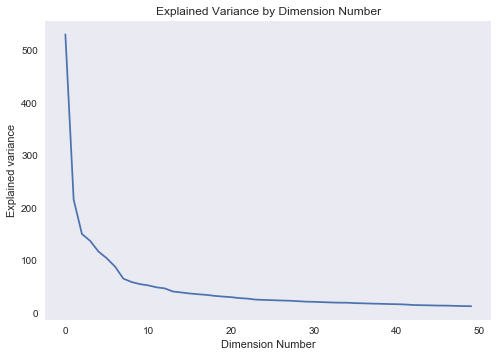

In [61]:
# K-Means doesn't work very well
# dimensionality reduction could be useful - try PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(clustering_data)
plt.plot(pca.explained_variance_)
plt.xlabel('Dimension Number')
plt.ylabel('Explained variance')
plt.title('Explained Variance by Dimension Number')
plt.grid(False)
plt.show()

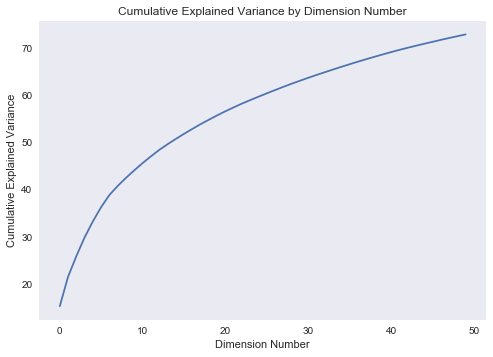

In [62]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
plt.xlabel('Dimension Number')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Dimension Number')
plt.grid(False)
plt.show()

In [56]:
# Reducing to 50 dimensions explains only 70 percent of the data's variance
# more confirmation that the data is all over the place
# Let's reduce to 2 dimensions

pca_df = pd.DataFrame()

pca = PCA(n_components=2)
pca_df['x'] = pca.fit_transform(clustering_data)[:,0]
pca_df['y'] = pca.fit_transform(clustering_data)[:,1]

In [86]:
# Visualize clusters for different value of k

clusterer = KMeans(n_clusters=2)
pca_df['K=2'] = clusterer.fit_predict(clustering_data)

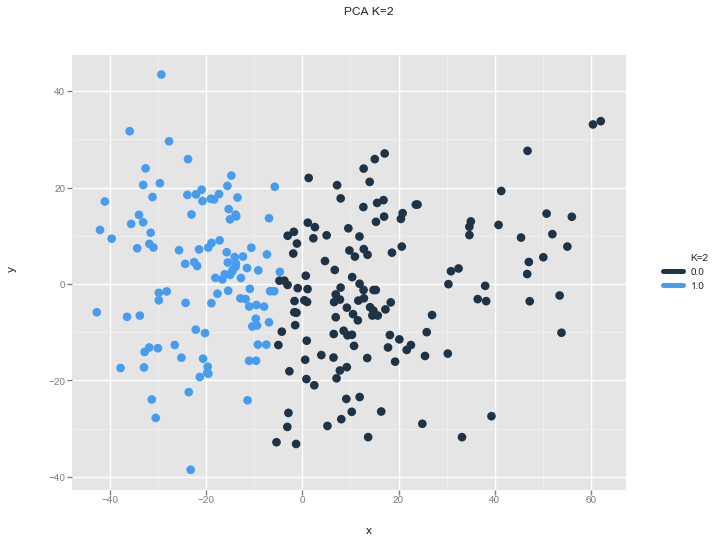

<ggplot: (-9223372036543666835)>

In [92]:
from ggplot import *

ggplot(pca_df, aes(x='x', y='y', color='K=2')) + \
    geom_point(size=75) + \
    ggtitle("PCA K=2")

In [89]:
# separates two clusters well in two dimensions

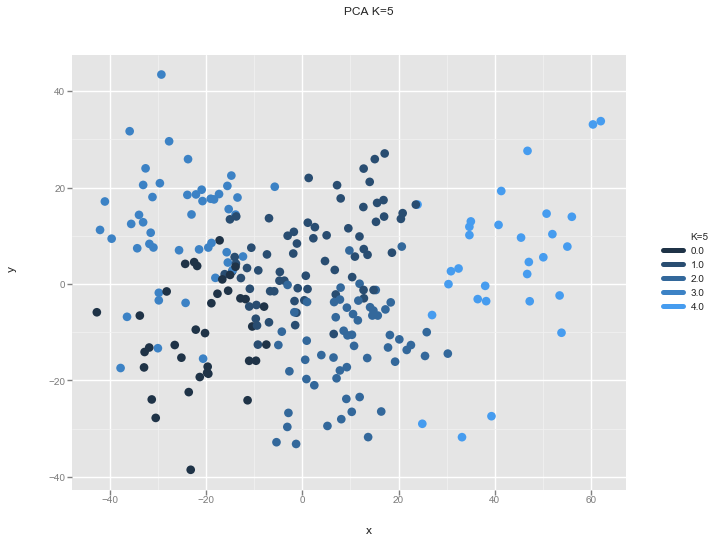

<ggplot: (306751601)>

In [91]:
cluster = KMeans(n_clusters = 5)
pca_df['K=5'] = cluster.fit_predict(clustering_data)

ggplot(pca_df, aes(x='x', y='y', color='K=5')) + \
    geom_point(size=75) + \
    ggtitle("PCA K=5")

In [ ]:
# does not separate 5 clusters well

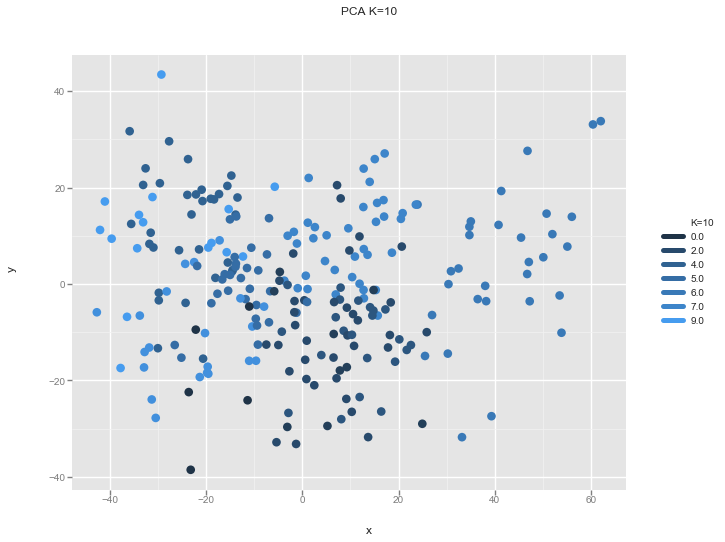

<ggplot: (311150200)>

In [93]:
cluster = KMeans(n_clusters = 10)
pca_df['K=10'] = cluster.fit_predict(clustering_data)

ggplot(pca_df, aes(x='x', y='y', color='K=10')) + \
    geom_point(size=75) + \
    ggtitle("PCA K=10")

In [94]:
# very randomly distributed
# Let's see if different forms of clustering work better
# try agglomerative clustering

from sklearn.cluster import AgglomerativeClustering

def compare_agg_clustering(k_list,data):
    ## Run clustering with different k and check the metrics
    for k in k_list:
        clusterer = AgglomerativeClustering(n_clusters=k, )
        clusterer.fit(data)
        ## The higher (up to 1) the better
        print("Silhouette Coefficient for k == %s: %s" % (
        k, round(metrics.silhouette_score(data, clusterer.labels_), 4)))
        print("------------------------")

In [95]:
print(compare_agg_clustering(n_clusters, clustering_data))

Silhouette Coefficient for k == 2: 0.0905
------------------------
Silhouette Coefficient for k == 5: 0.0751
------------------------
Silhouette Coefficient for k == 7: 0.0691
------------------------
Silhouette Coefficient for k == 10: 0.0752
------------------------
Silhouette Coefficient for k == 20: 0.074
------------------------
Silhouette Coefficient for k == 25: 0.0822
------------------------
Silhouette Coefficient for k == 50: 0.0977
------------------------
Silhouette Coefficient for k == 75: 0.1029
------------------------
Silhouette Coefficient for k == 100: 0.1059
------------------------
Silhouette Coefficient for k == 115: 0.1078
------------------------
None


In [97]:
# performs slightly better than kmeans
# try Affinity Propogation

from sklearn.cluster import AffinityPropagation

af = AffinityPropagation().fit(clustering_data)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient == %s" % (round(metrics.silhouette_score(clustering_data, labels), 4)))

Estimated number of clusters: 30
Silhouette Coefficient == 0.0729


In [110]:
# not very smooth
# try spectral

from sklearn.cluster import SpectralClustering

def compare_spec_clustering(k_list,data):
    ## Run clustering with different k and check the metrics
    for k in k_list:
        clusterer = SpectralClustering(n_clusters=k, )
        clusterer.fit(data)
        ## The higher (up to 1) the better
        print("Silhouette Coefficient for k == %s: %s" % (
        k, round(metrics.silhouette_score(data, clusterer.labels_), 4)))
        print("------------------------")

In [111]:
print(compare_spec_clustering(n_clusters, clustering_data))

//anaconda/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



Silhouette Coefficient for k == 2: -0.0038
------------------------
Silhouette Coefficient for k == 5: -0.0181
------------------------
Silhouette Coefficient for k == 7: -0.0224
------------------------
Silhouette Coefficient for k == 10: -0.0383
------------------------
Silhouette Coefficient for k == 20: -0.1885
------------------------
Silhouette Coefficient for k == 25: -0.1848
------------------------
Silhouette Coefficient for k == 50: -0.1949
------------------------
Silhouette Coefficient for k == 75: -0.1899
------------------------
Silhouette Coefficient for k == 100: -0.1672
------------------------
Silhouette Coefficient for k == 115: -0.1443
------------------------
None


In [147]:
# very poor
# let's try clustering by genes now

gene_clustering_data = final_expression_df.iloc[:,2:].as_matrix()

In [148]:
print(compare_k_means(n_clusters, gene_clustering_data))

Silhouette Coefficient for k == 2: 0.222
------------------------
Silhouette Coefficient for k == 5: 0.0791
------------------------
Silhouette Coefficient for k == 7: 0.0644
------------------------
Silhouette Coefficient for k == 10: 0.0535
------------------------
Silhouette Coefficient for k == 20: 0.0301
------------------------
Silhouette Coefficient for k == 25: 0.0238
------------------------
Silhouette Coefficient for k == 50: 0.0173
------------------------
Silhouette Coefficient for k == 75: 0.0138
------------------------
Silhouette Coefficient for k == 100: 0.0111
------------------------
Silhouette Coefficient for k == 115: 0.0084
------------------------
None


In [150]:
# K-means k = 2 performs slighly better in genes, could be benign vs. malignant tumors

print(compare_agg_clustering(n_clusters, gene_clustering_data))

Silhouette Coefficient for k == 2: 0.286
------------------------
Silhouette Coefficient for k == 5: 0.0466
------------------------
Silhouette Coefficient for k == 7: 0.0462
------------------------
Silhouette Coefficient for k == 10: 0.039
------------------------
Silhouette Coefficient for k == 20: 0.0056
------------------------
Silhouette Coefficient for k == 25: 0.0032
------------------------
Silhouette Coefficient for k == 50: -0.004
------------------------
Silhouette Coefficient for k == 75: -0.0044
------------------------
Silhouette Coefficient for k == 100: -0.0044
------------------------
Silhouette Coefficient for k == 115: -0.0037
------------------------
None


In [151]:
# Agglomerative k = 2 performs even better, still not ideal with that low of a silhouette coeffcicient 

af = AffinityPropagation().fit(gene_clustering_data)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient == %s" % (round(metrics.silhouette_score(gene_clustering_data, labels), 4)))

Estimated number of clusters: 292
Silhouette Coefficient == 0.003


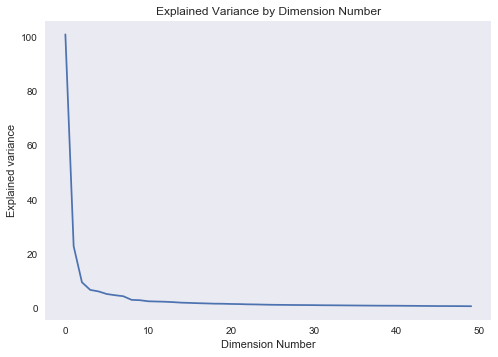

In [153]:
# dimensionality reduction could be useful - try PCA again for genes

from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(gene_clustering_data)
plt.plot(pca.explained_variance_)
plt.xlabel('Dimension Number')
plt.ylabel('Explained variance')
plt.title('Explained Variance by Dimension Number')
plt.grid(False)
plt.show()

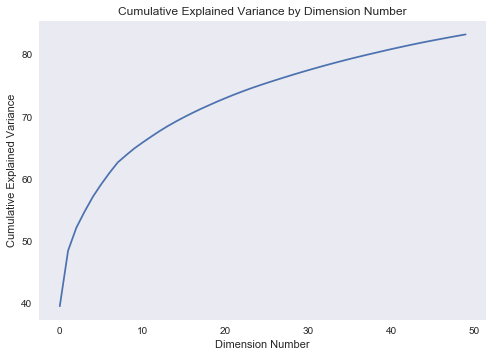

In [154]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
plt.xlabel('Dimension Number')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Dimension Number')
plt.grid(False)
plt.show()

In [155]:
# reducing to two components does a better job for genes than by cell types
# 2 dimensions explain a little more than half of the gene's variance
# Let's reduce to 2 dimensions

pca_df = pd.DataFrame()

pca = PCA(n_components=2)
pca_df['x'] = pca.fit_transform(gene_clustering_data)[:,0]
pca_df['y'] = pca.fit_transform(gene_clustering_data)[:,1]

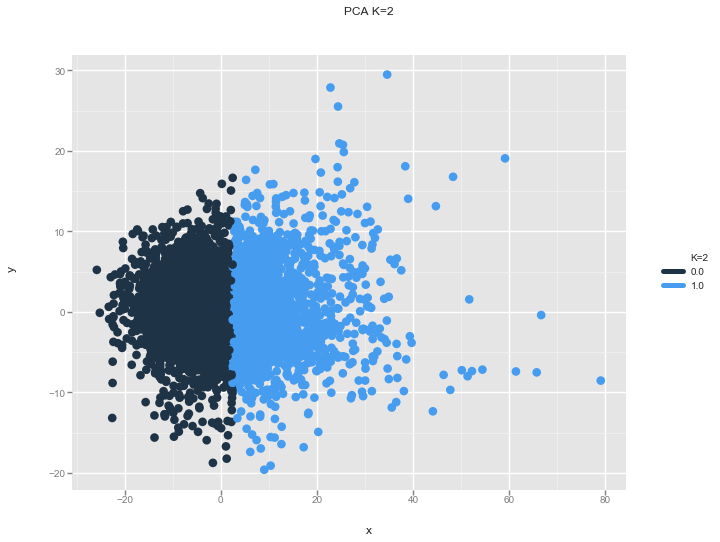

<ggplot: (-9223372036531332271)>

In [157]:
# Visualize clusters for different value of k

clusterer = KMeans(n_clusters=2)
pca_df['K=2'] = clusterer.fit_predict(gene_clustering_data)

ggplot(pca_df, aes(x='x', y='y', color='K=2')) + \
    geom_point(size=75) + \
    ggtitle("PCA K=2")

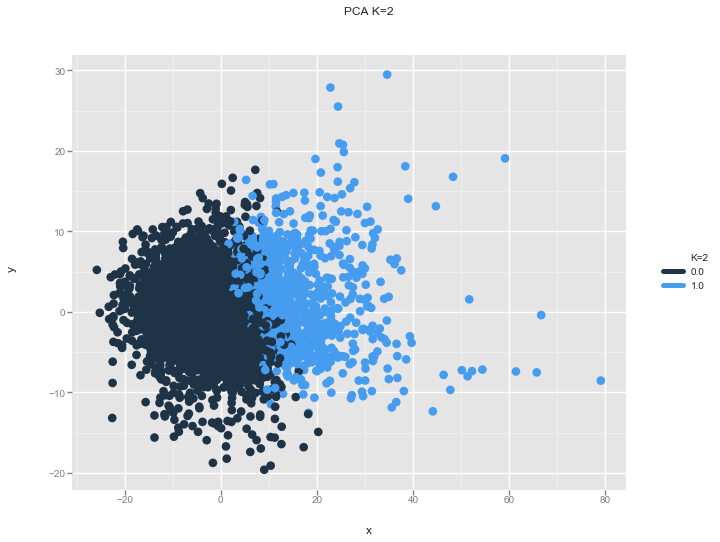

<ggplot: (300382661)>

In [158]:
# about what one would expect , very random scatter of points
# visualize with agglomerative clustering for k=2

clusterer = AgglomerativeClustering(n_clusters=2)
pca_df['K=2'] = clusterer.fit_predict(gene_clustering_data)

ggplot(pca_df, aes(x='x', y='y', color='K=2')) + \
    geom_point(size=75) + \
    ggtitle("PCA K=2")

In [ ]:
# less smooth but neither are good
# overall there doesn't appear to be much interesting overlap between gene expression between differing cell types